# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  


---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  



## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline 

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


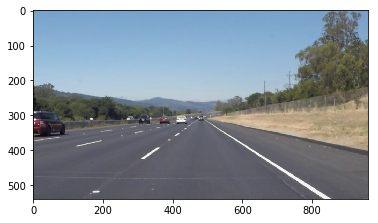

In [2]:
#reading in an image

image = mpimg.imread('test_images/solidWhiteRight.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [3]:
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = int(image.shape[0])
    y2 = int(y1*(3/5))
    x1 = int((y1 - intercept) / slope)
    x2 = int((y2 - intercept) / slope)
    return np.array([x1, y1, x2, y2])


def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        #for x1, y1, x2, y2 in line:
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    #if len(left_fit) and len(right_fit):

    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
    #averaged_lines = [left_line, right_line]
    return np.array([left_line, right_line])

def canny(image):
    """Applies the Canny transform"""
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny 


def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for x1, y1, x2, y2 in lines:
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image
    

def roi(image):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    mask = np.zeros_like(image)
    xsize = image.shape[1]
    ysize = image.shape[0]
    left_bottom = (80, ysize)
    left_top = (xsize / 2 - 50, ysize /2 + 50)
    right_bottom = (xsize - 80, ysize)
    right_top = (xsize / 2 + 50, ysize / 2 + 50)
    polygons = np.array([[left_bottom, left_top, right_top, right_bottom]], dtype=np.int32)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

In [4]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [5]:
#lane_image = np.copy(image)
# Color selection 
thresholds = (image[:,:,0] < 220) \
                | (image[:,:,1] < 120) \
                | (image[:,:,2] < 50)
            
img_mask = np.copy(image)
img_mask[thresholds] = [0,0,0]
img_mask_gray = grayscale(img_mask)

In [ ]:
#Making some Testing
"""canny_image = canny(lane_image)
img_edges_dil = cv2.dilate(canny_image, cv2.getStructuringElement(cv2.MORPH_DILATE, (5, 5)))
img_edges_dil = cv2.erode(img_edges_dil, cv2.getStructuringElement(cv2.MORPH_ERODE, (3, 3)))
canny_merge = img_mask_gray + img_edges_dil
cropped_image = roi(canny_merge)
lines = cv2.HoughLinesP(cropped_image, 2, np.pi / 180, 50, np.array([]), minLineLength=100, maxLineGap=160)
averaged_lines = average_slope_intercept(lane_image, lines)
line_image = display_lines(lane_image, averaged_lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1., 0.)
plt.imshow(roi(combo_image))"""

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [6]:
import os
os.listdir("test_images/")

['solidWhiteRight.jpg',
 'solidWhiteCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg',
 'solidYellowCurve.jpg']

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

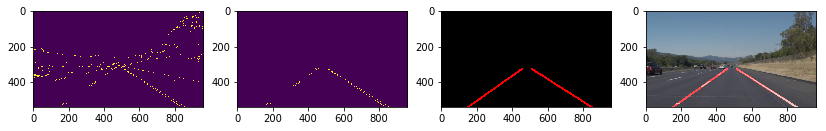

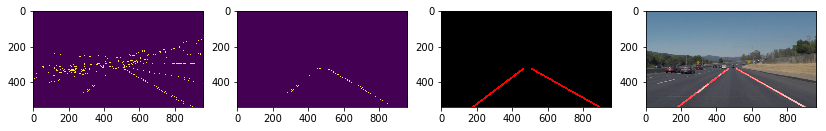

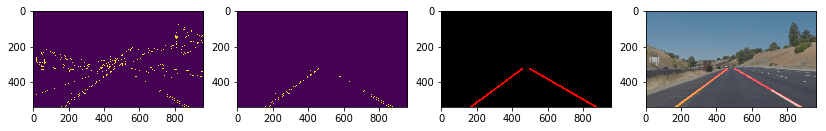

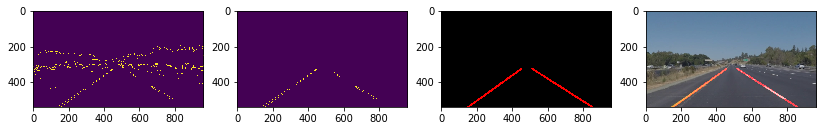

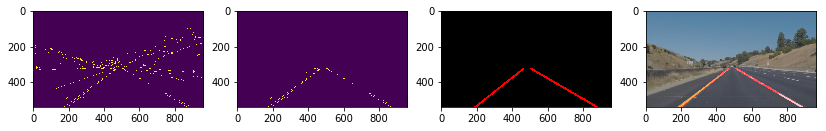

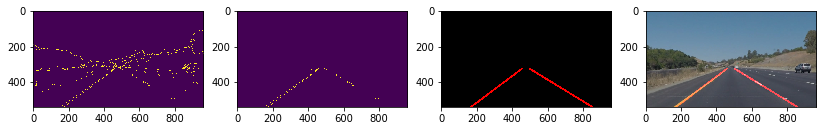

In [8]:
frames = os.listdir("test_images/")
for i in frames:
    image = mpimg.imread("test_images/" + i)
    canny_image = canny(image)
    #img_edges_dil = cv2.dilate(canny_image, cv2.getStructuringElement(cv2.MORPH_DILATE, (5, 5)))
    #img_edges_dil = cv2.erode(img_edges_dil, cv2.getStructuringElement(cv2.MORPH_ERODE, (3, 3)))
    #canny_merge = img_mask_gray + img_edges_dil
    cropped_image = roi(canny_image)
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi / 180, 50, np.array([]), minLineLength=100, maxLineGap=160)
    averaged_lines = average_slope_intercept(image, lines)
    line_image = display_lines(image, averaged_lines)
    combo_image = cv2.addWeighted(image, 0.8, line_image, 1., 0.)
    
    plt.figure(figsize=(25,15))
    plt.subplot(171), plt.imshow(canny_image)
    plt.subplot(172), plt.imshow(cropped_image)
    #plt.subplot(173), plt.imshow(lines)
    #plt.subplot(174), plt.imshow(averaged_lines)
    plt.subplot(173), plt.imshow(line_image)
    plt.subplot(174), plt.imshow(combo_image)

    plt.show()

## Test on Videos



We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`



**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://discussions.udacity.com/t/project-error-of-test-on-videos/274082) for more troubleshooting tips across operating systems.**

In [9]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [10]:
def process_image(image):
    canny_image = canny(image)
    cropped_image = roi(canny_image)
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi / 180, 50, np.array([]), minLineLength=100, maxLineGap=160)
    averaged_lines = average_slope_intercept(image, lines)
    line_image = display_lines(image, averaged_lines)
    combo_image = cv2.addWeighted(image, 0.8, line_image, 1., 0.)
    return combo_image

Let's try the one with the solid white lane on the right first ...

In [11]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|█████████▉| 221/222 [00:12<00:00, 15.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 2.96 s, sys: 174 ms, total: 3.14 s
Wall time: 14.6 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [12]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [13]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|█████████▉| 681/682 [00:44<00:00, 14.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 9.18 s, sys: 716 ms, total: 9.9 s
Wall time: 46 s


In [14]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

# Improved lane finding pipeline

There are several lines found by pipeline for a piece of lane line, we should find an averaged line for that piece of lane line. Moreover, some lines are not continuous, they detected as a set of segments, so we need to extrapolate them to a full lane line.



In [15]:
white_output_improved = 'test_videos_output/solidWhiteRight_improved.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output_improved, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight_improved.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight_improved.mp4


100%|█████████▉| 221/222 [00:12<00:00, 15.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight_improved.mp4 

CPU times: user 2.94 s, sys: 209 ms, total: 3.15 s
Wall time: 14.7 s


In [16]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output_improved))

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [17]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [18]:
imshape = image.shape

p1 = (0.0,imshape[0]) 
p2 = (0.48*imshape[1], 0.61*imshape[0]) #61
p23 = (0.5*imshape[1],p2[1])
p241 = (p23[0]-1.3*p1[0],p1[1])
p242 = (p23[0]+1.3*p1[0],p1[1])
p3 = (0.55*imshape[1], p2[1]) #57
p4 = (imshape[1],imshape[0])
vertices = np.array([[p1,p2,p3,p4]], dtype=np.int32) # Road ROI
vertices_l = np.array([[p1,p2,p23,p241]], dtype=np.int32) # Left Road ROI
vertices_r = np.array([[p242,p23,p3,p4]], dtype=np.int32) # Right Road ROI
vertices_lr = [vertices_l,vertices_r]


In [19]:
def ch_process_image(image):
    #canny_image = canny(image)
    img_edges_dil = cv2.dilate(img_mask_gray, cv2.getStructuringElement(cv2.MORPH_DILATE, (5, 5)))
    img_edges_dil = cv2.erode(img_edges_dil, cv2.getStructuringElement(cv2.MORPH_ERODE, (3, 3)))
    #canny_merge = canny_image + img_edges_dil
    cropped_image = region_of_interest(img_edges_dil, vertices_lr )
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi / 180, 50, np.array([]), minLineLength=100, maxLineGap=160)
    averaged_lines = average_slope_intercept(image, lines)
    line_image = display_lines(image, averaged_lines)
    combo_image = cv2.addWeighted(image, 0.8, line_image, 1., 0.)
    return combo_image

In [20]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(ch_process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4


100%|██████████| 251/251 [00:29<00:00,  8.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge.mp4 

CPU times: user 3.86 s, sys: 352 ms, total: 4.22 s
Wall time: 32.3 s


In [21]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))